# Fancy Indexing

We have now considered 2 ways to access chunks of an array:

1. Slicing
2. Boolean masks

There is yet another way that we can get access to parts of an array, known as *fancy indexing.* Fancy indexing is like simple indexing and slicing - but instead we pass an array of indices that we want to extract.

Let's start by loading NumPy and setting a seed for reproducibility:


In [1]:
import numpy as np
rand = np.random.RandomState(1234567890)

## The Basics

Consider a simple random array:

In [3]:
x = rand.randint(100, size=10)
print(x)

[ 2 47 12 51 33 43 60 14  9  4]


if w want to get 3 elements from the array, we could do this:

In [4]:
[x[9], x[2], x[5]]


[4, 12, 43]

'Fancy indexing' gives us a simpler way to go forward. We write an array of the indices we want to select, and pass that to the way we would normally index:

In [5]:
# equiv to
ind = [9, 2, 5]
x[ind]

array([ 4, 12, 43])

The shape of the output array will depend on the shaoe of the index array:

In [6]:
ind = np.array([[9, 2],
                [5, 5]])
x[ind]

array([[ 4, 12],
       [43, 43]])

Naturally, fancy indexing extends to multidimensional arrays:

In [7]:
# and on multiple dimensions

X = np.arange(15).reshape((3, 5))
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  6, 13])

Or we can get a two dimensional result:

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 7,  6,  8],
       [12, 11, 13]])

In [10]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

This last example shows both the power of fancy indexing and the need to think about the output you want - we can *broadcast* the shape of the indices, and then pull out the relevant data with *fancy indexing*

## Combined Indexing

We can combine fancy indexing with any other way of indxing data:

In [11]:
print(X)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


Like simple indexing

In [12]:
X[2, [2, 0, 1]]

array([12, 10, 11])

slicing:

In [12]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

and Boolean Masks:

In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] # for each row get the second and third column

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

One useful way to use fancy indexing is to extract random subsets of rows or columns from a data set:

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

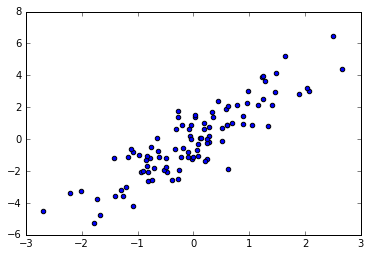

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

We can select random points from the data:

In [16]:
indices = np.random.choice(X.shape[0], 50, replace=False)
indices

array([61, 65, 19,  9, 30, 17, 71,  8, 35, 64, 76, 44, 32, 39, 25, 34, 68,
       62, 27, 49, 37, 13, 31, 83, 60, 94, 11, 18, 59, 48, 63, 98, 54, 85,
       38, 95, 96, 90,  0, 67, 84,  5, 20, 89, 56, 72, 88,  2, 57, 33])

In [17]:
selection = X[indices]  # fancy indexing here
selection.shape

(50, 2)

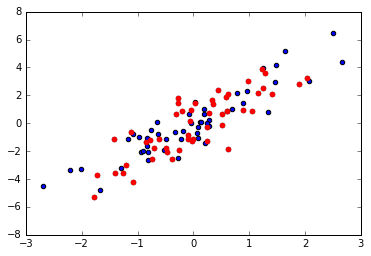

In [23]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(selection[:, 0], selection[:, 1], color='red');

## Modifying Values with Fancy Indexing


We can use fancy indexing to modify parts of an array:

In [31]:
x = np.arange(11)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
idx = np.arange(0,11,2)
x[idx] = -x[idx]
print(x)

[  0   1  -2   3  -4   5  -6   7  -8   9 -10]


In [34]:
x[idx] *= 10
print(x)

[   0    1  -20    3  -40    5  -60    7  -80    9 -100]


## Challenge: 

1. Load the alabama unemployment data, random sample 50 points and compute summary stats. Do they look similar to the complete data? 
2. Repeat the computation for sample sizes 20 and 70.


## Partial Solution

In [35]:
alabama = np.genfromtxt('../data/LAUST010000000000003.csv', 
                            delimiter=',', skip_header=1, 
                            usecols=(3))

In [37]:
idx = np.random.choice(alabama.shape[0], 50, replace=False)

In [38]:
sample = alabama[idx]
sample.shape

(50,)

In [43]:
[np.mean(sample), np.mean(alabama)]

[6.46, 6.5147058823529411]

In [44]:
[np.std(sample), np.std(alabama)]

[2.1656407827707715, 2.1707456502779618]

In [46]:
[np.max(sample), np.max(alabama)]

[12.1, 12.300000000000001]

In [45]:
[np.min(sample), np.min(alabama)]

[3.5, 3.2999999999999998]